Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_error: 0.0743528
[200]	valid_0's multi_error: 0.0701385
Early stopping, best iteration is:
[187]	valid_0's multi_error: 0.0698374


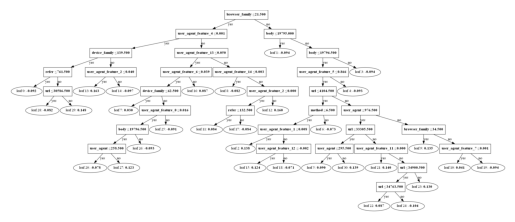

Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_error: 0.0803733
Early stopping, best iteration is:
[94]	valid_0's multi_error: 0.0800722


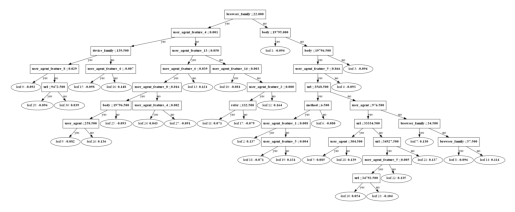

Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_error: 0.0731487
[200]	valid_0's multi_error: 0.0707405
[300]	valid_0's multi_error: 0.0713426
Early stopping, best iteration is:
[244]	valid_0's multi_error: 0.0695364


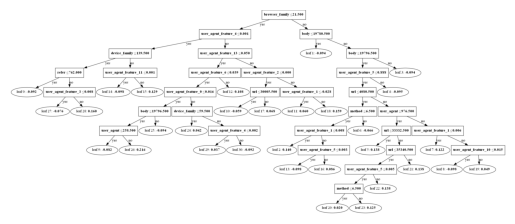

Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_error: 0.0704395
[200]	valid_0's multi_error: 0.0680313
[300]	valid_0's multi_error: 0.0677303
Early stopping, best iteration is:
[226]	valid_0's multi_error: 0.0665262


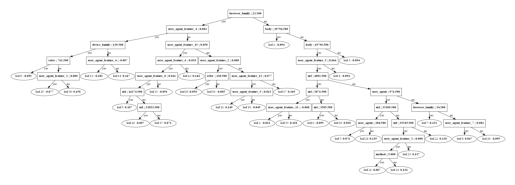

Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_error: 0.0821794
[200]	valid_0's multi_error: 0.0788682
[300]	valid_0's multi_error: 0.0791692
Early stopping, best iteration is:
[259]	valid_0's multi_error: 0.0776641


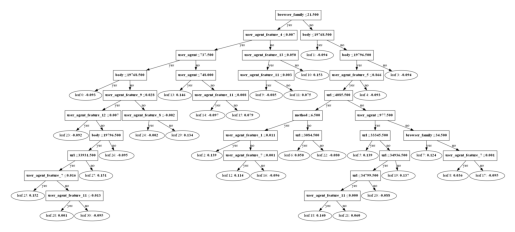

Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_error: 0.0809753
[200]	valid_0's multi_error: 0.0794702
Early stopping, best iteration is:
[180]	valid_0's multi_error: 0.0788682


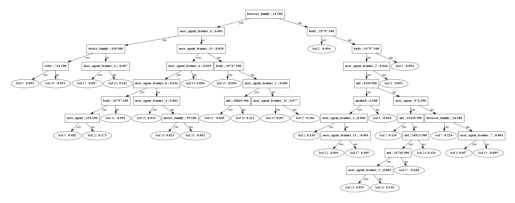

Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_error: 0.0659241
[200]	valid_0's multi_error: 0.0590006
[300]	valid_0's multi_error: 0.0574955
[400]	valid_0's multi_error: 0.0565924
Early stopping, best iteration is:
[316]	valid_0's multi_error: 0.0565924


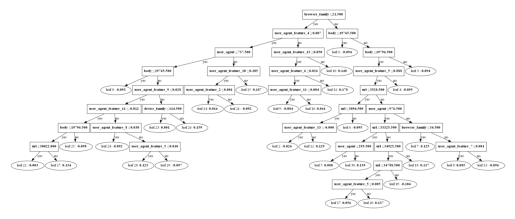

Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_error: 0.0683323
[200]	valid_0's multi_error: 0.0671282
[300]	valid_0's multi_error: 0.0659241
Early stopping, best iteration is:
[251]	valid_0's multi_error: 0.0656231


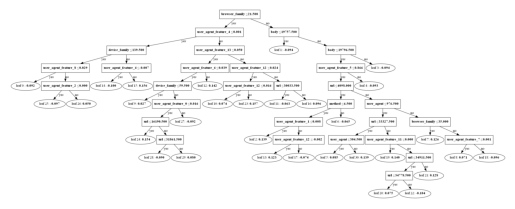

Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_error: 0.0761589
[200]	valid_0's multi_error: 0.0731487
[300]	valid_0's multi_error: 0.0743528
Early stopping, best iteration is:
[201]	valid_0's multi_error: 0.0728477


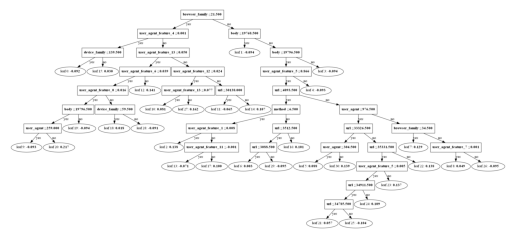

Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_error: 0.0710629
[200]	valid_0's multi_error: 0.0725685
Early stopping, best iteration is:
[113]	valid_0's multi_error: 0.0701596


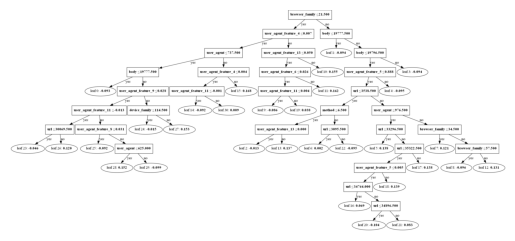

accuracy_score = 0.9292272494656673


In [3]:
"""
机器学习-决策树
http://t.csdn.cn/p5jit
LightGBM多类分类
http://t.csdn.cn/pGdZO
机器学习分类算法LightGBM
http://t.csdn.cn/M9lZH
LightGBM分类实战
http://t.csdn.cn/AmhyR
Python实现LightGBM
http://t.csdn.cn/WF2s4
lightgbm基本框架
http://t.csdn.cn/cM13A
文本数据如何转化成数字数据进行分析？
https://zhuanlan.zhihu.com/p/381605776
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

"""
python：user_agents 一个解析(浏览器/HTTP)用户代理的库
https://blog.csdn.net/LIFENG0402/article/details/120832220?spm=1001.2014.3001.5506
user_agents通过解析(浏览器/HTTP)用户代理字符串，提供了一种简单的方法来识别设备。user_agents依赖于优秀的ua-parser对原始用户代理字符串进行解析
"""
from user_agents import parse

"""
sklearn-TfidfVectorizer彻底说清楚
https://zhuanlan.zhihu.com/p/67883024
文本特征抽取TfidfVectorizer(特征工程之特征提取)
https://blog.csdn.net/qq_27328197/article/details/113820065
TFIDF的主要思想是：如果某个词或短语在一篇文章中出现的频率TF高，并且在其他文章中很少出现，则认为此词或者短语具有很好的类别区分能力，适合用来分类。TF-IDF是一种统计方法，用以评估一字词对于一个文件集或一个语料库中的其中一份文件的重要程度。
TfidfVectorizer将原始文档集合转换为 TF-IDF 特征矩阵。
"""
from sklearn.feature_extraction.text import TfidfVectorizer

"""
自然语言处理--基于截断的 SVD （TruncatedSVD）的短消息语义分析:提取主题向量
https://blog.csdn.net/fgg1234567890/article/details/112438678
它可以处理稀疏矩阵，所以如果我们正在处理大规模数据集，那么无论如何都要使用TruncatedSVD而非 PCA。
TruncatedSVD 的 SVD 部分将 TF-IDF 矩阵分解为 3 个矩阵，其截断部分将丢弃包含 TF-IDF 矩阵最少信息的维度。这些被丢弃的维度表示文档集中变化最小的主题（词的线性组合），它们可能对语料库的总体语义没有意义。它们可能会包含许多停用词和其他词，这些词在所有文档中均匀分布。

使用 TruncatedSVD 仅仅保留 16 个主题，这些主题在 TF-IDF 向量中所占的方差最大
"""
from sklearn.decomposition import TruncatedSVD

"""
使用LabelEncoder对特征进行硬编码
http://t.csdn.cn/Zih0l
特征编码的作用
https://www.csdn.net/tags/MtjaQg4sMzgwMzUtYmxvZwO0O0OO0O0O.html
处理无法量化的数据 便于得到更优模型 以更细粒度的处理我们的数据
"""
from sklearn.preprocessing import LabelEncoder

"""
k折交叉验证器
"""
from sklearn.model_selection import StratifiedKFold

"""
准确度分类得分
"""
from sklearn.metrics import accuracy_score

"""
lightgbm是一个梯度Boosting框架,使用基于决策树的学习算法。
具体见官网文档https://lightgbm.readthedocs.io/en/latest/index.html
"""
import lightgbm
from lightgbm import early_stopping
from lightgbm import log_evaluation

# ##数据处理 训练集train 测试集test 并修正错误列名->label
train = pd.concat([
    pd.read_csv('data/SQL注入.csv'),
    pd.read_csv('data/XSS跨站脚本.csv'),
    pd.read_csv('data/命令执行.csv'),
    pd.read_csv('data/白.csv'),
    pd.read_csv('data/目录遍历.csv'),
    pd.read_csv('data/远程代码执行.csv'),
], axis=0).reset_index(drop=True)
train = train.rename(columns={'lable': 'label'})
test = pd.read_csv('data/test.csv')

""" 为df填充空值 除了id和label都是object, 因此选择填充NAN
# id	method	user_agent	url	refer	body	label
# id为编号 无实际意义
# method为get或者是post方法等
# user_agent为用户代理 这个属性的属性值包含了很多内容 包括浏览器类型、操作系统及版本、CPU 类型、浏览器渲染引擎、浏览器语言、浏览器插件等信息的标识 可以有效的用于区分样本并且用于分类 因此还需要从其中提取一些属性出来(user_agents)
# url 标识一个互联网资源，并指定对其进行操作或获取该资源的方法
# refer 访问来源,手动输入而非跳转通常为0
# body 存储实际通信数据
"""
# 将训练集train和测试集test连接得数据集df以便共同处理 处理完之后再分离即可
df = pd.concat([train, test], axis=0).reset_index(drop=True)
# 将空缺数据设为NAN,避免LabelEncoder编号时报错
df['method'] = df['method'].fillna('NAN')
df['user_agent'] = df['user_agent'].fillna('NAN')
df['url'] = df['url'].fillna('NAN')
df['refer'] = df['refer'].fillna('NAN')
df['body'] = df['body'].fillna('NAN')


# ## 特征工程
# iphone的UserAgent数据获取函数 row代表一行的数据
def get_user_agent_content(row):
    user_agent = parse(row['user_agent'])
    browser_family = str(user_agent.browser.family)  # 浏览器类型
    os_family = str(user_agent.os.family)  # 操作系统类型
    device_family = str(user_agent.device.family)  # 设备类型
    return browser_family, os_family, device_family


# df加用户代理的类型新列三列并为其赋值
user_agent_columns = ['browser_family', 'os_family', 'device_family']
df[user_agent_columns] = df.apply(get_user_agent_content, axis=1,
                                  result_type="expand")  # df.apply针对df的每一行来运行get_ua函数,expand返回值以列形式返回

# 将df的user_agent列数据转为行
df_user_agent_content_list = df['user_agent'].values.tolist()

# 向df增加用户代理的16种类别 TfidfVectorizer.fit_transform将集合转换为 TF-IDF 特征矩阵
tfidfVectorizerObject = TfidfVectorizer(min_df=3, max_df=0.5, analyzer='char_wb', ngram_range=(2, 5))
TF_IDF_feature_matrix = tfidfVectorizerObject.fit_transform(df_user_agent_content_list)

# 潜在语义分析 得到主特征,使用 TruncatedSVD 仅仅保留 16 个特征，这些特征在 TF-IDF 向量中所占的方差最大
n_components_count = 16
truncatedSVDModel = TruncatedSVD(n_components=n_components_count,
                                 random_state=42)
TF_IDF_feature_matrix_dimensionality_reduced = truncatedSVDModel.fit_transform(
    TF_IDF_feature_matrix)  # 将模型拟合到 TF_IDF_feature_matrix 并对 TF_IDF_feature_matrix 执行降维
df_TF_IDF_feature_matrix_dimensionality_reduced = pd.DataFrame(TF_IDF_feature_matrix_dimensionality_reduced)
df_TF_IDF_feature_matrix_dimensionality_reduced.columns = [f'user agent feature {i}' for i in range(n_components_count)]
df = pd.concat([df, df_TF_IDF_feature_matrix_dimensionality_reduced], axis=1)

#  将df的非数字属性值进行变为数字 从而便于量化以供矩阵运算 df的useragent提取的16个属性无需进行转化,通过TfidfVectorizer得到的矩阵就已经是量化的了
columns = ['method', 'user_agent', 'url', 'refer', 'body'] + user_agent_columns
for column in columns:
    lbl = LabelEncoder()
    lbl.fit(df[column])
    df[column] = lbl.transform(df[column])

# 从df中把train和test提取出来
train, test = df[:len(train)], df[len(train):]


# ##  模型训练:使用lightGBM得到Booster模型 使用10折交叉验证进行模型的评估(accuracy_score)
def lightGBM(train, train_label_column, test):
    """
    进行机器学习训练得到模型 lightgbm
    :param train:训练集
    :param train_label_column:训练集的标记空间
    :param test:测试集
    :return:针对训练集的预测集train_predict,针对测试集的预测集test_predict
    """
    train_columns_except_label_id = [f for f in train.columns if f not in ['label', 'id']]
    train_predict = np.zeros((train.shape[0], 6))
    test_predict = 0

    # 定义一个10折交叉验证器用于模型建立及评估
    # 设置可重现的种子
    seed = 6
    # 在给定样本中，拿出大部分样本进行建立模型，留小部分样本用于刚建立的模型进行预测
    stratifiedKFoldModel = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
    # 生成索引train_index和test_index以将数据拆分为训练集和测试集
    for i, (train_index, test_index) in enumerate(stratifiedKFoldModel.split(train, train_label_column)):
        train__real_predict, test__real_predict = train_label_column.iloc[train_index], train_label_column.iloc[
            test_index]
        train_, test_ = train[train_columns_except_label_id].iloc[train_index, :], train[
                                                                                       train_columns_except_label_id].iloc[
                                                                                   test_index, :]
        """
        LightGBM API https://lightgbm.readthedocs.io/en/latest/Python-API.html
        """
        # 使用LightGBM的数据结构进行存储,如果不这样做,会发生异常
        dataSet_train_ = lightgbm.Dataset(train_, label=train__real_predict)
        dataSet_test_ = lightgbm.Dataset(test_, label=test__real_predict)
        """
            lightgbm官方文档参数指南
            https://lightgbm.readthedocs.io/en/latest/Parameters.html
            """
        # 设置模型建立相关参数
        parameters = {
            'objective': 'multiclass',  # 多类分类应用
            'metric': 'multi_error',  # 要在评估集上评估的指标为错误率
            'num_class': 6,  # 分类的数量为6,即label=[0,1,2,3,4,5]
            'verbose': -1,  # 控制 LightGBM 的详细程度 要求-1,不然会炸
            'nthread': 15,  # LightGBM 的线程数,为获得最佳速度，设置为实际 CPU 内核数，而不是线程数
        }
        # 根据数据进行训练得到booster模型
        lightgbm_booster_model = lightgbm.train(
            parameters,  # 训练参数
            dataSet_train_,  # 训练数据
            num_boost_round=1000,  # 迭代次数 默认100
            valid_sets=[dataSet_test_],  # 训练期间要评估的数据列表
            callbacks=[early_stopping(100), log_evaluation(100)],
            # 每次迭代时应用的回调函数列表 early_stopping
            # 创建一个激活提前停止的回调 og_evaluation 创建一个记录评估结果的回调  没有出现趋势的可能轮数为100次则停止
            # log_evaluation 创建一个记录评估结果的回调  记录评估结果的时间段为100 默认为1
        )
        # 绘图
        # 绘制的并不是预测值  leaf_value即未经sigmoid规格化的预测值,所以会有负值 https://www.coryjmaklin.com/2019-05-17_Machine-Learning-Part-18--Boosting-Algorithms--Gradient-Boosting-In-Python-ef5ae6965be4/
        fig = plt.figure()
        ax = fig.subplots()
        lightgbm.plot_tree(lightgbm_booster_model, tree_index=30, dpi=2000, ax=ax,orientation ="vertical")
        plt.show()
        # 将针对训练集属性空间的预测结果列结果存入预测集 用于模型评估
        train_predict[test_index] = lightgbm_booster_model.predict(test_[train_columns_except_label_id])
        # 将针对测试集属性空间的预测结果列结果存入预测集 用于提交赛事
        test_predict += lightgbm_booster_model.predict(test[train_columns_except_label_id])
    return train_predict, test_predict


# 训练集的特征集(不包括id和label)
train_columns_except_label_id = [f for f in train.columns if f not in ['label', 'id']]

train_predict, test_predict = lightGBM(train=train[train_columns_except_label_id], train_label_column=train['label'],
                                       test=test[train_columns_except_label_id])

# 模型评估:模型分类精度 训练集的预测结果为参照 argmax为沿轴最大值的索引(即分类,从0-5) 将其与训练集的标记相比较即可得到模型分类精度(1-错误率)
print(f"accuracy_score = {accuracy_score(train['label'], np.argmax(train_predict, axis=1))}")

# # 实际应用:使用模型来进行目标测试集的预测，以供提交赛事
# predict=pd.read_csv('data/test.csv')
# predict['predict']=np.argmax(test_predict,axis=1)
# predict.to_csv('predict.csv',index=None)

pass
